# Time Series

## Create a timestamp

In [53]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np

# You can use a datetime object
ts = pd.Timestamp(datetime(2020, 7, 22))
print(ts)

# Or more easily a string
ts = pd.Timestamp("2020-07-22")
print(ts)

2020-07-22 00:00:00
2020-07-22 00:00:00


## Accessing timestamp info

In [15]:
# Some data points are stored as properties:
print("Year:", ts.year)
print("Week:", ts.week)

# While others need to be accessed via methods:
print("Day Name:", ts.day_name())
print("Time:", ts.time())

Year: 2020
Week: 30
Day Name: Wednesday
Time: 00:00:00


## Periods

In [30]:
# Default frequency is "M" (month)
period_monthly = pd.Period("2020-07")
print("Period:", period_monthly)
print("Next Period:", period_monthly + 1)

period_daily = pd.Period("2020-07-01", freq="D")
print("\nPeriod:", period_daily)
print("Next Period:", period_daily + 1)

# Converting frequencies
print("\nMonthly to Daily:", period_monthly.asfreq("D"))

# Converting to a timestamp
print("Period to timestamp:", period_monthly.to_timestamp())

# And can convert timestamps to period:
print("Timestamp to period:", pd.Timestamp("2020-07-22").to_period(freq="D"))

Period: 2020-07
Next Period: 2020-08

Period: 2020-07-01
Next Period: 2020-07-02

Monthly to Daily: 2020-07-31
Period to timestamp: 2020-07-01 00:00:00
Timestamp to period: 2020-07-22


## Date Ranges

In [35]:
# With a specific end date:
specific_end_date = pd.date_range(start="2020-07-01", end="2020-07-31", freq="D")
print(specific_end_date)

number_of_periods = pd.date_range(start="2020-07-01", periods=31, freq="D")
print("\n", number_of_periods)



DatetimeIndex(['2020-07-01', '2020-07-02', '2020-07-03', '2020-07-04',
               '2020-07-05', '2020-07-06', '2020-07-07', '2020-07-08',
               '2020-07-09', '2020-07-10', '2020-07-11', '2020-07-12',
               '2020-07-13', '2020-07-14', '2020-07-15', '2020-07-16',
               '2020-07-17', '2020-07-18', '2020-07-19', '2020-07-20',
               '2020-07-21', '2020-07-22', '2020-07-23', '2020-07-24',
               '2020-07-25', '2020-07-26', '2020-07-27', '2020-07-28',
               '2020-07-29', '2020-07-30', '2020-07-31'],
              dtype='datetime64[ns]', freq='D')

 DatetimeIndex(['2020-07-01', '2020-07-02', '2020-07-03', '2020-07-04',
               '2020-07-05', '2020-07-06', '2020-07-07', '2020-07-08',
               '2020-07-09', '2020-07-10', '2020-07-11', '2020-07-12',
               '2020-07-13', '2020-07-14', '2020-07-15', '2020-07-16',
               '2020-07-17', '2020-07-18', '2020-07-19', '2020-07-20',
               '2020-07-21', '2020-07-22

## Converting a string column to datetime and setting as the index

In [41]:
df = pd.DataFrame({
    "date": ["2020-07-21", "2020-07-22", "2020-07-23"],
    "values": [5, 9, 10]
})

df["date"] = pd.to_datetime(df["date"])
df.set_index("date", inplace=True)
df

,values
date,
2020-07-21,5
2020-07-22,9
2020-07-23,10


## Plotting a time series from a data frame

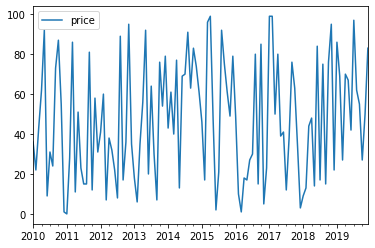

In [105]:
index = pd.date_range(start="2010-01-01", end="2019-12-31", freq="MS")
values = np.random.randint(0, 100, size=len(index))
df = pd.DataFrame(values, columns=["price"], index=index)

df.plot()
plt.show()

## Plotting multiple columns

            price  users
2010-01-01     36      2
2010-02-01     22      4
2010-03-01     43      2
2010-04-01     62      5
2010-05-01     92      0


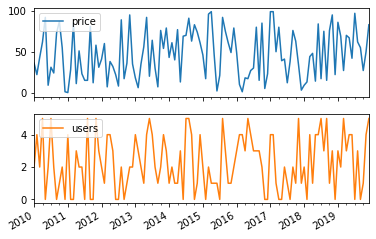

In [108]:
df["users"] = np.random.randint(0, 6, size=len(index))
print(df.head())

# subplots will cause pyplot to show one chart per column
df.plot(subplots=True)
plt.show()

In [ ]:
## Slicing a time series data frame

In [98]:

print(df.head())

# Slice to get all values in a year
print("\nRows in 2018:", len(df['2018']))

# Can also give it a range - note that the second value is inclusive
print("Rows in 2018 - 2019:", len(df['2018':'2019']))

# Or slice by month
print("Rows in Jan 2018 - March 2019:", len(df['2018-01-01':'2019-03-01']))

# And of course using loc to grab a specific value
print("Price on a specific day", df.loc["2010-01-01", "price"])

            price
2010-01-01     78
2010-02-01     11
2010-03-01     72
2010-04-01     87
2010-05-01     77

Rows in 2018: 12
Rows in 2018 - 2019: 24
Rows in Jan 2018 - March 2019: 15
Price on a specific day 78


## Changing the frequency of a time series

In [104]:
# Upsampling because new frequency is higher than original frequency:
daily = df.asfreq("D")

print("Upsampling:\n", daily.head())

Upsampling:
             price
2010-01-01   78.0
2010-01-02    NaN
2010-01-03    NaN
2010-01-04    NaN
2010-01-05    NaN
